In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2018.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                    text
0      cisco ccnp jaringan komputer materi route swit...
1                instalasi konfigurasi jaringan komputer
2                          jaringan komputer data lanjut
3      kajian literatur masalah masalah dihadapi mata...
4          artikel struktur data audit jaringan komputer
5      perancangan implementasi sistem informasi penj...
6      proxy server management bandwidth jaringan kom...
7                          menit mahir jaringan komputer
8      perancangan jaringan closed circuit television...
9            perancangan jaringan virtual metametarouter
10                     keylogger aspek keamanan komputer
11         artikel struktur data audit jaringan komputer
12     analisis perancangan blueprint infrastruktur j...
13     desain keamanan jaringan mikrotik router os me...
14     perancangan sistem pemantauan gas peringatan r...
15     analisis quality service qos kinerja sistem ho...
16     perbandingan hasil belaj

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

10319
[['cisco', 'ccnp', 'jaringan', 'komputer', 'materi', 'route', 'switch', 'troubleshooting']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['cisco', 'ccnp', 'jaringan', 'komputer', 'materi', 'route', 'switch', 'troubleshooting', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['instalasi', 'konfigurasi', 'jaringan', 'komputer', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['jaringan', 'komputer', 'data', 'lanjut', 'jaringan_komputer', 'jaringan_komputer', 'jaringan_komputer'], ['kajian', 'literatur', 'masalah', 'masalah', 'dihadapi', 'mata', 'kuliah', 'jaringan', 'komputer', 'mata_kuliah', 'jaringan_komputer', 'mata_kuliah', 'jaringan_komputer', 'mata_kuliah', 'jaringan_komputer'], ['artikel', 'struktur', 'data', 'audit', 'jaringan', 'komputer', 'struktur_data', 'jaringan_komputer', 'struktur_data', 'jaringan_komputer', 'struktur_data', 'jaringan_komputer'], ['perancangan', 'implementasi', 'sistem', 'informasi', 'penjualan', 'komputer', 'accessories', 'toko', 'mujahidah', 'computer', 'web', 'sistem_informasi', 'sistem_informasi', 'sistem_informasi'], ['proxy', 'server', 'management', 'b

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                   0             1              2               3   \
0               cisco          ccnp       jaringan        komputer   
1           instalasi   konfigurasi       jaringan        komputer   
2            jaringan      komputer           data          lanjut   
3              kajian     literatur        masalah         masalah   
4             artikel      struktur           data           audit   
5         perancangan  implementasi         sistem       informasi   
6               proxy        server     management       bandwidth   
7               menit         mahir       jaringan        komputer   
8         perancangan      jaringan         closed         circuit   
9         perancangan      jaringan        virtual  metametarouter   
10          keylogger         aspek       keamanan        komputer   
11            artikel      struktur           data           audit   
12           analisis   perancangan      blueprint   infrastruktur   
13             desai

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(13373 unique tokens: ['ccnp', 'cisco', 'jaringan', 'jaringan_komputer', 'komputer']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

10319


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.2821641348
Num Topics = 4  has Coherence Value of 0.3629987084
Num Topics = 6  has Coherence Value of 0.4841610608
Num Topics = 8  has Coherence Value of 0.4888463478
Num Topics = 10  has Coherence Value of 0.5196816
Num Topics = 12  has Coherence Value of 0.5175148458
Num Topics = 14  has Coherence Value of 0.5403896492
Num Topics = 16  has Coherence Value of 0.5563853715
Num Topics = 18  has Coherence Value of 0.5228982954


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)
pprint(model.print_topics())

[(0,
  '0.018*"sistem_informasi" + 0.014*"raspberry_pi" + 0.009*"studi_kasus" + '
  '0.008*"information_system" + 0.007*"information" + 0.007*"rumah_sakit" + '
  '0.007*"keputusan_penentuan" + 0.007*"informasi" + 0.006*"sistem_pendukung" '
  '+ 0.006*"peserta_didik"'),
 (1,
  '0.019*"metode_forward" + 0.013*"sistem_pakar" + 0.010*"undang" + '
  '0.010*"nomor_tahun" + 0.008*"data_mining" + 0.007*"bangun_aplikasi" + '
  '0.007*"upaya_peningkatan" + 0.007*"forward" + 0.007*"chaining" + '
  '0.006*"nomor"'),
 (2,
  '0.013*"one_time" + 0.010*"sumber_daya" + 0.009*"e_mail" + '
  '0.007*"mikrokontroler" + 0.006*"ta" + 0.006*"ilmu_komputer" + 0.006*"ilmu" '
  '+ 0.006*"sekolah_tinggi" + 0.006*"hukum_pidana" + '
  '0.006*"persediaan_barang"'),
 (3,
  '0.018*"pengembangan_media" + 0.017*"media_pembelajaran" + '
  '0.015*"pembelajaran" + 0.014*"mata_pelajaran" + 0.011*"kelas_x" + '
  '0.010*"hasil_belajar" + 0.010*"media" + 0.008*"perguruan_tinggi" + '
  '0.008*"pengembangan" + 0.008*"pencarian_l

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=16)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.012*"pemanfaatan_teknologi" + 0.011*"hukum" + 0.011*"studi_kasus" + 0.009*"jawa_timur" + 0.008*"sistem_informasi" + 0.008*"nasional" + 0.007*"metode_waterfall" + 0.007*"prestasi_belajar" + 0.006*"geographic_information" + 0.006*"siswa_smk"
Topic: 1 Word: 0.015*"media_pembelajaran" + 0.015*"pengembangan_media" + 0.014*"sistem_informasi" + 0.014*"pembelajaran" + 0.012*"mata_pelajaran" + 0.009*"akuntansi" + 0.009*"e_learning" + 0.009*"kelas_x" + 0.009*"pengembangan" + 0.009*"media"
Topic: 2 Word: 0.021*"pengamanan" + 0.021*"kriptografi" + 0.013*"pengamanan_pesan" + 0.011*"algoritma" + 0.011*"caesar_cipher" + 0.010*"cipher" + 0.010*"pengamanan_file" + 0.009*"pencarian_lokasi" + 0.008*"sistem_informasi" + 0.008*"perguruan_tinggi"
Topic: 3 Word: 0.013*"augmented_reality" + 0.013*"citra_digital" + 0.012*"cyber" + 0.009*"ancaman" + 0.009*"technology_acceptance" + 0.008*"fakultas_ekonomi" + 0.008*"steganografi" + 0.007*"platform_android" + 0.007*"games" + 0.007*"sekolah_dasar"


# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,11.0,0.6757,"metode_forward, sistem_pakar, universitas_nege...","[cisco, ccnp, jaringan, komputer, materi, rout..."
1,1,13.0,0.5011,"perangkat_lunak, perpustakaan_universitas, add...","[instalasi, konfigurasi, jaringan, komputer, j..."
2,2,13.0,0.6288,"perangkat_lunak, perpustakaan_universitas, add...","[jaringan, komputer, data, lanjut, jaringan_ko..."
3,3,11.0,0.6208,"metode_forward, sistem_pakar, universitas_nege...","[kajian, literatur, masalah, masalah, dihadapi..."
4,4,13.0,0.9279,"perangkat_lunak, perpustakaan_universitas, add...","[artikel, struktur, data, audit, jaringan, kom..."
5,5,9.0,0.9375,"sumber_daya, elektronik, encryption, sistem_in...","[perancangan, implementasi, sistem, informasi,..."
6,6,5.0,0.6383,"aes, strategi_peningkatan, sistem_informasi, k...","[proxy, server, management, bandwidth, jaringa..."
7,7,11.0,0.6121,"metode_forward, sistem_pakar, universitas_nege...","[menit, mahir, jaringan, komputer, jaringan_ko..."
8,8,6.0,0.9148,"sistem_informasi, rancang_bangun, vigenere_cip...","[perancangan, jaringan, closed, circuit, telev..."
9,9,10.0,0.8125,"sistem_pendukung, keputusan_penentuan, e_comme...","[perancangan, jaringan, virtual, metametarouter]"


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

10.0    978
7.0     867
1.0     861
6.0     846
5.0     812
11.0    809
4.0     707
15.0    583
14.0    567
13.0    540
2.0     521
12.0    495
8.0     491
3.0     484
0.0     410
9.0     348
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

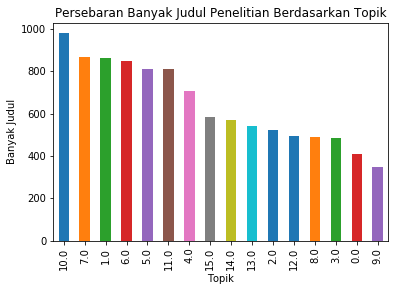

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9625,"pemanfaatan_teknologi, hukum, studi_kasus, jawa_timur, sistem_informasi, nasional, metode_waterf...","[perencanaan, strategis, sistem, informasi, teknologi, informasi, dinas, perindustrian, tenaga, ..."
1,1.0,0.9653,"media_pembelajaran, pengembangan_media, sistem_informasi, pembelajaran, mata_pelajaran, akuntans...","[perancangan, pembuatan, media, pembelajaran, android, mata, pelajaran, sistem, komputer, studi,..."
2,2.0,0.9479,"pengamanan, kriptografi, pengamanan_pesan, algoritma, caesar_cipher, cipher, pengamanan_file, pe...","[perancangan, implementasi, sistem, informasi, pencarian, alamat, penting, kota, padang, aplikas..."
3,3.0,0.9479,"augmented_reality, citra_digital, cyber, ancaman, technology_acceptance, fakultas_ekonomi, stega...","[perbaikan, citra, median, filter, akurasi, klasifikasi, motif, sasirangan, perbaikan_citra, med..."
4,4.0,0.9554,"sistem_informasi, file, program_studi, studi_kasus, rancang_bangun_sistem_informasi, one_time, r...","[program, studi, sistem, informasi, fakultas, teknik, universitas, nusantara, pgri, kediri, prog..."
5,5.0,0.9609,"aes, strategi_peningkatan, sistem_informasi, keuangan, des, data_mining, menerapkan_metode, zaka...","[perbandingan, metode, analytical, hierarchy, process, ahp, analytic, network, process, anp, kla..."
6,6.0,0.9479,"sistem_informasi, rancang_bangun, vigenere_cipher, informasi, vigenere, raspberry_pi, analisis_f...","[sistem, informasi, manajemen, kepelabuhan, pelayaran, faktor, faktor, keselamatan, pelayaran, k..."
7,7.0,0.9639,"sistem_pendukung, keputusan_pemilihan, pendukung, kinerja_karyawan, enkripsi, studi_kasus, keput...","[rancang, bangun, sistem, pendukung, keputusan, pemilihan, dosen, pembimbing, skripsi, metode, a..."
8,8.0,0.9375,"object_oriented, sistem_informasi, pondok_pesantren, k_means, atmega328, algoritma_k, kota_medan...","[pengaruh, menonton, anime, jepang, internet, perilaku, imitasi, kalangan, komunitas, japan, clu..."
9,9.0,0.9592,"sumber_daya, elektronik, encryption, sistem_informasi, sms_gateway, sms, encryption_standard, mi...","[rancang, bangun, model, deteksi, pelanggaran, zebra, cross, traffic, light, metode, adaptif, ba..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2018.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
5      0.030140  0.009097       1        1  7.782941
10    -0.154967  0.058093       2        1  7.670588
7     -0.144482  0.018453       3        1  7.446872
1      0.025582 -0.229586       4        1  7.342782
11     0.009848 -0.053349       5        1  6.911870
4      0.021723 -0.022353       6        1  6.419804
13    -0.042937  0.011385       7        1  6.249522
14     0.005919  0.015122       8        1  6.238688
15    -0.076914  0.001283       9        1  6.211039
6      0.126953  0.082884      10        1  6.194777
2      0.059240  0.097289      11        1  5.654009
12     0.034342  0.004781      12        1  5.549461
8      0.032308  0.008675      13        1  5.467174
3      0.045080  0.020675      14        1  5.236260
0     -0.007845 -0.043844      15        1  5.015644
9      0.036009  0.021396      16        1  4.608562, topic_info=   

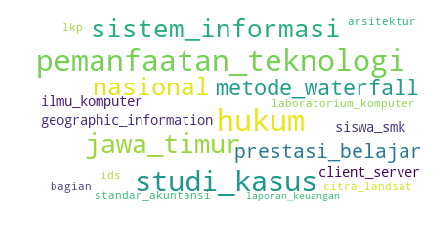

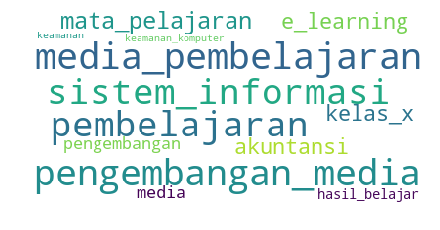

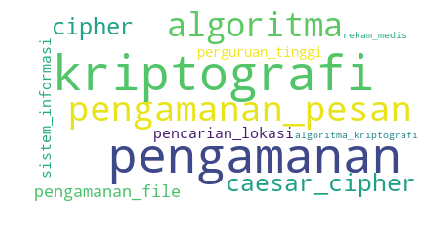

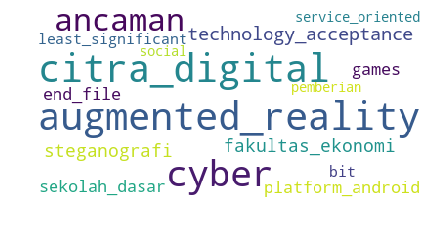

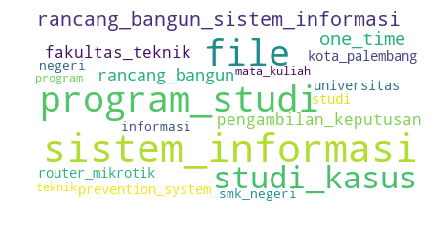

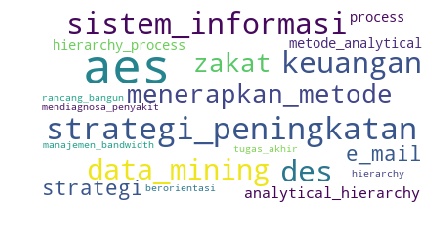

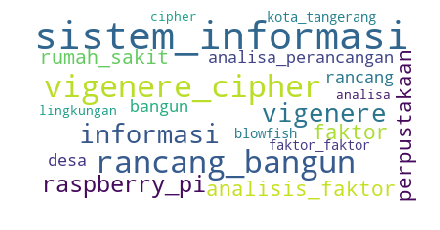

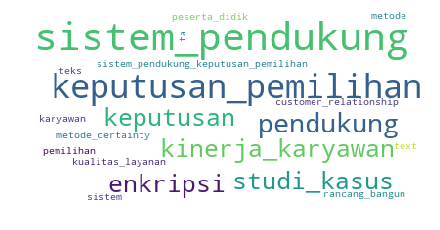

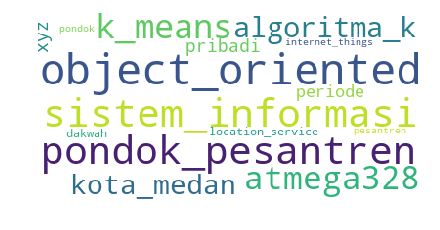

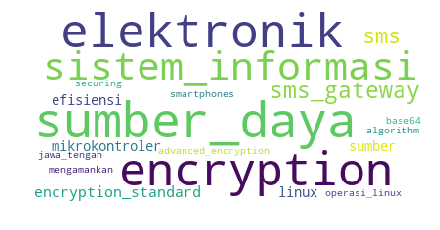

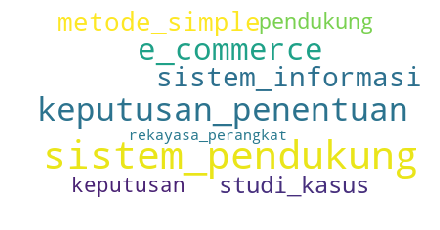

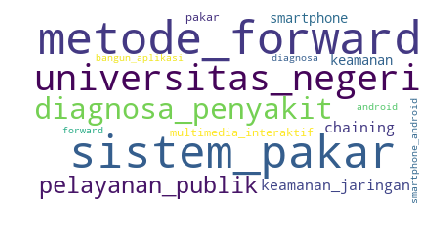

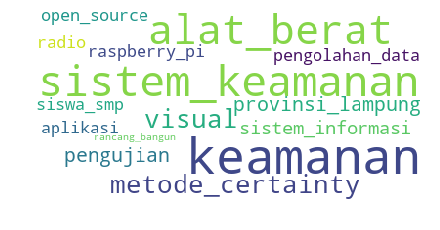

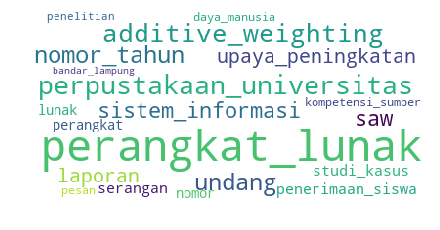

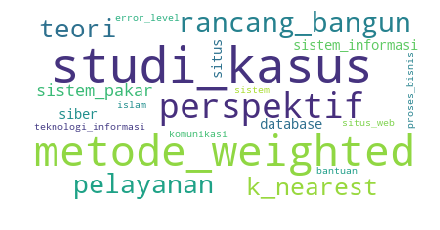

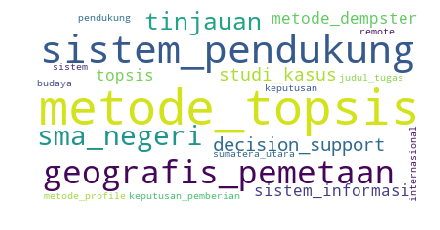

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2018.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')